In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path
import hvplot.pandas
from MCForecastTools import MCSimulation
import pygal
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

In [2]:
# Reading hash returns
global_hash_path = Path("global_hash_rates.csv")
hash_df = pd.read_csv(global_hash_path, index_col="date", parse_dates=True, infer_datetime_format=True)
hash_df.head()

,country,monthly_hashrate_%,monthly_absolute_hashrate_EH/S
date,,,
2019-09-01,Mainland China,75.53%,66.76
2019-09-01,Other,6.1%,5.39
2019-09-01,Russian Federation,5.93%,5.24
2019-09-01,United States,4.06%,3.59
2019-09-01,Malaysia,3.25%,2.88


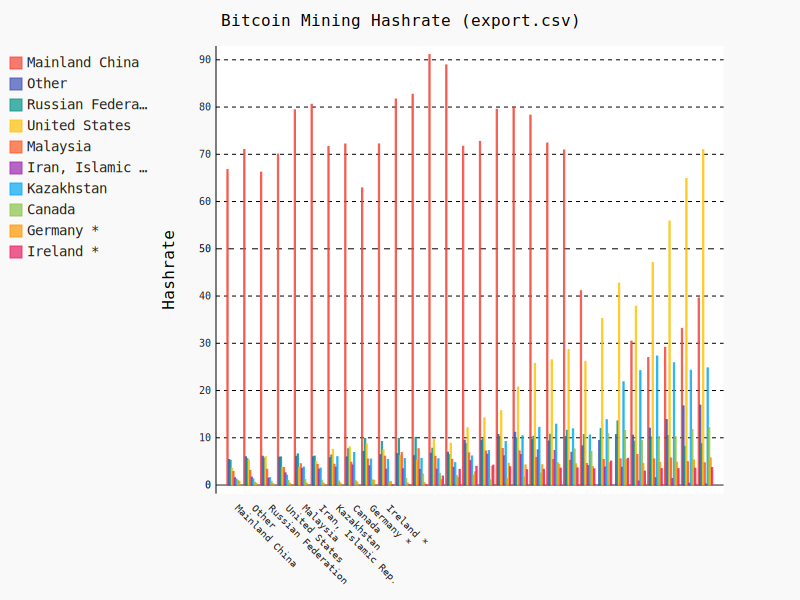

In [3]:
from IPython.display import SVG, display
display(SVG(filename='bitcoin_mining_hashrate_export.csv.svg'))

# Load the export.csv file into a Pandas DataFrame
export_df = pd.read_csv('Resources/export.csv')

export_df['monthly_absolute_hashrate_EH/S'] = pd.to_numeric(export_df['monthly_absolute_hashrate_EH/S'])

# Create a Pygal chart object
chart = pygal.Bar()
# Add data to the chart
for country in export_df['country'].unique():
    chart.add(country, export_df[export_df['country'] == country]['monthly_absolute_hashrate_EH/S'])

# Customize the chart
chart.title = 'Bitcoin Mining Hashrate (export.csv)'
chart.x_labels = export_df['country'].unique()
chart.x_label_rotation = 45
chart.y_title = 'Hashrate'
chart.show_legend = True

# Render the chart to a file
chart.render_to_file("bitcoin_mining_hashrate_export.csv.svg")

In [4]:
# Cleaning the data
hash_df.isnull().sum()
hash_df.isnull().sum() / len(hash_df) * 100
hash_df.dropna(inplace=True)
hash_df.sort_index(inplace=True)
hash_df.head()

,country,monthly_hashrate_%,monthly_absolute_hashrate_EH/S
date,,,
2019-09-01,Mainland China,75.53%,66.76
2019-09-01,Other,6.1%,5.39
2019-09-01,Russian Federation,5.93%,5.24
2019-09-01,United States,4.06%,3.59
2019-09-01,Malaysia,3.25%,2.88


In [5]:
# Cleaning the data / drop monthly hash rate column
hash_df = hash_df.drop(columns=["monthly_hashrate_%"])
hash_df.head(10)

,country,monthly_absolute_hashrate_EH/S
date,,
2019-09-01,Mainland China,66.76
2019-09-01,Other,5.39
2019-09-01,Russian Federation,5.24
2019-09-01,United States,3.59
2019-09-01,Malaysia,2.88
2019-09-01,"Iran, Islamic Rep.",1.54
2019-09-01,Kazakhstan,1.26
2019-09-01,Canada,0.94
2019-09-01,Germany *,0.80


In [6]:
# Cleaning the data specific to country
# Mainland China
hash_df_China = hash_df.loc[hash_df['country'] == 'Mainland China'].copy()
hash_df_China.head()
# Other
hash_df_Other = hash_df.loc[hash_df['country'] == 'Other'].copy()
hash_df_Other.head(10)
# Russian Federation
hash_df_Russia = hash_df.loc[hash_df['country'] == 'Russian Federation'].copy()
hash_df_Russia.head(10)
# United States
hash_df_US = hash_df.loc[hash_df['country'] == 'United States'].copy()
hash_df_US.head(10)
# Malaysia
hash_df_Malaysia = hash_df.loc[hash_df['country'] == 'Malaysia'].copy()
hash_df_Malaysia.head(10)
# Iran
hash_df_Iran = hash_df.loc[hash_df['country'] == 'Iran, Islamic Rep.'].copy()
hash_df_Iran.head(10)
# Kazakhstan
hash_df_Kazakhstan = hash_df.loc[hash_df['country'] == 'Kazakhstan'].copy()
hash_df_Kazakhstan.head(10)
# Kazakhstan
hash_df_Canada = hash_df.loc[hash_df['country'] == 'Canada'].copy()
hash_df_Canada.head(10)
# Germany
hash_df_Germany = hash_df.loc[hash_df['country'] == 'Germany *'].copy()
hash_df_Germany.head(10)
# Germany
hash_df_Ireland = hash_df.loc[hash_df['country'] == 'Ireland *'].copy()
hash_df_Ireland.fillna(0, inplace=True)
#hash_df_Ireland_returns = hash_df_Ireland.pct_change(['monthly_absolute_hashrate_EH/S'])
hash_df_Ireland_returns = hash_df_Ireland.iloc[:,1].pct_change()
hash_df_Ireland_returns.head(100)

date
2019-09-01          NaN
2019-10-01          NaN
2019-11-01          NaN
2019-12-01          NaN
2020-01-01          NaN
2020-02-01          NaN
2020-03-01          NaN
2020-04-01          NaN
2020-05-01          NaN
2020-06-01          inf
2020-07-01    -0.500000
2020-08-01     3.000000
2020-09-01    46.750000
2020-10-01     0.732984
2020-11-01     0.196375
2020-12-01     0.063131
2021-01-01    -0.083135
2021-02-01    -0.163212
2021-03-01     0.024768
2021-04-01     0.078550
2021-05-01     0.014006
2021-06-01    -0.052486
2021-07-01     0.481050
2021-08-01     0.112205
2021-09-01    -0.479646
2021-10-01     0.180272
2021-11-01    -0.002882
2021-12-01     0.028902
2022-01-01     0.036517
Name: monthly_absolute_hashrate_EH/S, dtype: float64

<Axes: xlabel='date'>

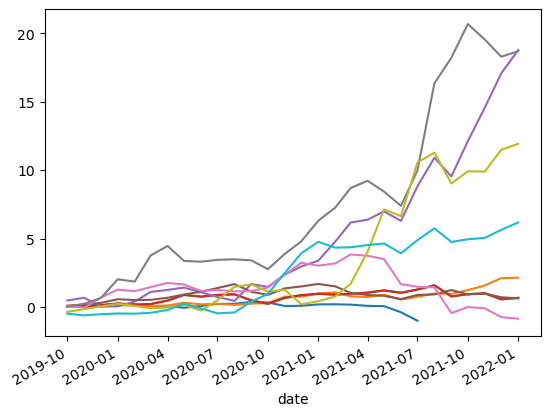

In [7]:
#Calculate China daily returns and cumulative returns
China_returns = hash_df_China.iloc[:,1].pct_change()
China_returns.dropna(inplace=True)
China_returns.head(20)
#Calculate cumulative returns
cumulative_China_returns = (1 + China_returns).cumprod() - 1
cumulative_China_returns.plot()

#Calculate Other daily returns and cumulative returns
Other_returns = hash_df_Other.iloc[:,1].pct_change()
Other_returns.dropna(inplace=True)
Other_returns.head(20)
#Calculate cumulative returns
cumulative_Other_returns = (1 + Other_returns).cumprod() - 1
cumulative_Other_returns.plot()

#Calculate Russia daily returns and cumulative returns
Russia_returns = hash_df_Russia.iloc[:,1].pct_change()
Russia_returns.dropna(inplace=True)
Russia_returns.head(20)
#Calculate cumulative returns
cumulative_Russia_returns = (1 + Russia_returns).cumprod() - 1
cumulative_Russia_returns.plot()

#Calculate Russia daily returns and cumulative returns
Russia_returns = hash_df_Russia.iloc[:,1].pct_change()
Russia_returns.dropna(inplace=True)
Russia_returns.head(20)
#Calculate cumulative returns
cumulative_Russia_returns = (1 + Russia_returns).cumprod() - 1
cumulative_Russia_returns.plot()

#Calculate US daily returns and cumulative returns
US_returns = hash_df_US.iloc[:,1].pct_change()
US_returns.dropna(inplace=True)
US_returns.head(20)
#Calculate cumulative returns
cumulative_US_returns = (1 + US_returns).cumprod() - 1
cumulative_US_returns.plot()

#Calculate Malaysia daily returns and cumulative returns
Malaysia_returns = hash_df_Malaysia.iloc[:,1].pct_change()
Malaysia_returns.dropna(inplace=True)
Malaysia_returns.head(20)
#Calculate cumulative returns
cumulative_Malaysia_returns = (1 + Malaysia_returns).cumprod() - 1
cumulative_Malaysia_returns.plot()

#Calculate Iran daily returns and cumulative returns
Iran_returns = hash_df_Iran.iloc[:,1].pct_change()
Iran_returns.dropna(inplace=True)
Iran_returns.head(20)
#Calculate cumulative returns
cumulative_Iran_returns = (1 + Iran_returns).cumprod() - 1
cumulative_Iran_returns.plot()

#Calculate Kazakhstan daily returns and cumulative returns
Kazakhstan_returns = hash_df_Kazakhstan.iloc[:,1].pct_change()
Kazakhstan_returns.dropna(inplace=True)
Kazakhstan_returns.head(20)
#Calculate cumulative returns
cumulative_Kazakhstan_returns = (1 + Kazakhstan_returns).cumprod() - 1
cumulative_Kazakhstan_returns.plot()

#Calculate Canada daily returns and cumulative returns
Canada_returns = hash_df_Canada.iloc[:,1].pct_change()
Canada_returns.dropna(inplace=True)
Canada_returns.head(20)
#Calculate cumulative returns
cumulative_Canada_returns = (1 + Canada_returns).cumprod() - 1
cumulative_Canada_returns.plot()

#Calculate Germany daily returns and cumulative returns
Germany_returns = hash_df_Germany.iloc[:,1].pct_change()
Germany_returns.dropna(inplace=True)
Germany_returns.head(20)
#Calculate cumulative returns
cumulative_Germany_returns = (1 + Germany_returns).cumprod() - 1
cumulative_Germany_returns.plot()

#Calculate Ireland daily returns and cumulative returns
Ireland_returns = hash_df_Ireland.iloc[:,1].pct_change()
Ireland_returns.dropna(inplace=True)
Ireland_returns.head(20)
#Calculate cumulative returns
cumulative_Ireland_returns = (1 + Ireland_returns).cumprod() - 1
cumulative_Ireland_returns.plot()


In [8]:
#New Data Frame / Cumulative returns
combined_df = pd.concat([China_returns, Other_returns, Russia_returns, US_returns, Malaysia_returns, Iran_returns, Kazakhstan_returns, Canada_returns, Germany_returns, Ireland_returns], axis="columns", join="outer")
countries = ['China', 'Other', 'Russia', 'US', 'Malaysia', 'Iran', 'Kazakhstan', 'Canada', 'Germany', 'Ireland']
combined_df.columns = countries
combined_df.head(40)

,China,Other,Russia,US,Malaysia,Iran,Kazakhstan,Canada,Germany,Ireland
date,,,,,,,,,,
2019-10-01,0.063960,0.109462,0.062977,0.476323,0.076389,0.090909,0.031746,-0.351064,-0.487500,NaN
2019-11-01,-0.067859,0.020067,0.026930,0.135849,0.080645,-0.130952,0.200000,0.295082,-0.243902,NaN
2019-12-01,0.058148,-0.029508,0.038462,-0.387043,0.116418,0.773973,0.333333,0.240506,0.225806,NaN
2020-01-01,0.133457,0.027027,0.111111,0.018970,0.208556,0.351351,0.831731,0.183673,0.105263,NaN
2020-02-01,0.014860,-0.016447,-0.069697,0.335106,-0.037611,-0.051429,-0.055118,-0.120690,-0.023810,NaN
2020-03-01,-0.110932,-0.031773,0.037459,0.503984,0.009195,0.135542,0.666667,-0.166667,0.121951,NaN
2020-04-01,0.007537,0.029361,0.207221,0.068874,0.097950,0.127321,0.146667,0.070588,0.369565,NaN
2020-05-01,-0.128827,0.192953,0.283485,0.076828,0.143154,-0.042353,-0.200581,0.186813,0.587302,NaN
2020-06-01,0.147877,-0.095640,-0.066869,-0.140391,0.107078,-0.176904,-0.012727,-0.351852,-0.280000,inf


In [9]:
combined_df_2 = pd.concat([hash_df_China, hash_df_Other, hash_df_Russia, hash_df_US, hash_df_Malaysia, hash_df_Iran, hash_df_Kazakhstan, hash_df_Canada, hash_df_Germany, hash_df_Ireland], axis="columns", join="outer")
combined_df_2.columns = ["C1", 'China', "C2", 'Other', "C3", 'Russia', "C4", 'US', "C5", 'Malaysia', "C6", 'Iran', "C7", 'Kazakhstan', "C8", 'Canada', "C9", 'Germany', "C10", 'Ireland']
combined_df_2 = combined_df_2.drop(columns=['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10'])

# Create a list of tuples.
tuples = [('China', 'close'), ('Other', 'close'), ('Russia', 'close'), ('US', 'close'), ('Malaysia', 'close'), ('Iran', 'close'), ('kazakhstan', 'close'), ('Canada', 'close'), ('Germany', 'close'), ('Ireland', 'close')]

# Create a MultiIndex from the list of tuples.
index = pd.MultiIndex.from_tuples(tuples)

combined_df_2.columns = index


combined_df_2.head(40)

,China,Other,Russia,US,Malaysia,Iran,kazakhstan,Canada,Germany,Ireland
,close,close,close,close,close,close,close,close,close,close
date,,,,,,,,,,
2019-09-01,66.76,5.39,5.24,3.59,2.88,1.54,1.26,0.94,0.80,0.00
2019-10-01,71.03,5.98,5.57,5.30,3.10,1.68,1.30,0.61,0.41,0.00
2019-11-01,66.21,6.10,5.72,6.02,3.35,1.46,1.56,0.79,0.31,0.00
2019-12-01,70.06,5.92,5.94,3.69,3.74,2.59,2.08,0.98,0.38,0.00
2020-01-01,79.41,6.08,6.60,3.76,4.52,3.50,3.81,1.16,0.42,0.00
2020-02-01,80.59,5.98,6.14,5.02,4.35,3.32,3.60,1.02,0.41,0.00
2020-03-01,71.65,5.79,6.37,7.55,4.39,3.77,6.00,0.85,0.46,0.00
2020-04-01,72.19,5.96,7.69,8.07,4.82,4.25,6.88,0.91,0.63,0.00


In [10]:
combined_df = combined_df.fillna(0)
combined_df = combined_df.replace([np.inf, -np.inf], 0)
tuples = [('China', 'close'), ('Other', 'close'), ('Russia', 'close'), ('US', 'close'), ('Malaysia', 'close'), ('Iran', 'close'), ('kazakhstan', 'close'), ('Canada', 'close'), ('Germany', 'close'), ('Ireland', 'close')]
combined_df

,China,Other,Russia,US,Malaysia,Iran,Kazakhstan,Canada,Germany,Ireland
date,,,,,,,,,,
2019-10-01,0.063960,0.109462,0.062977,0.476323,0.076389,0.090909,0.031746,-0.351064,-0.487500,0.000000
2019-11-01,-0.067859,0.020067,0.026930,0.135849,0.080645,-0.130952,0.200000,0.295082,-0.243902,0.000000
2019-12-01,0.058148,-0.029508,0.038462,-0.387043,0.116418,0.773973,0.333333,0.240506,0.225806,0.000000
2020-01-01,0.133457,0.027027,0.111111,0.018970,0.208556,0.351351,0.831731,0.183673,0.105263,0.000000
2020-02-01,0.014860,-0.016447,-0.069697,0.335106,-0.037611,-0.051429,-0.055118,-0.120690,-0.023810,0.000000
2020-03-01,-0.110932,-0.031773,0.037459,0.503984,0.009195,0.135542,0.666667,-0.166667,0.121951,0.000000
2020-04-01,0.007537,0.029361,0.207221,0.068874,0.097950,0.127321,0.146667,0.070588,0.369565,0.000000
2020-05-01,-0.128827,0.192953,0.283485,0.076828,0.143154,-0.042353,-0.200581,0.186813,0.587302,0.000000
2020-06-01,0.147877,-0.095640,-0.066869,-0.140391,0.107078,-0.176904,-0.012727,-0.351852,-0.280000,0.000000


In [11]:
dfs_to_concat = [
    China_returns, Other_returns, Russia_returns, US_returns, Malaysia_returns,
    Iran_returns, Kazakhstan_returns, Canada_returns, Germany_returns, Ireland_returns
]
country_names = [
    'China', 'Other', 'Russia', 'US', 'Malaysia',
    'Iran', 'Kazakhstan', 'Canada', 'Germany', 'Ireland'
]
multi_index = pd.MultiIndex.from_product([country_names, ['close']], names=['Country', 'Data'])
combined_df = pd.concat(dfs_to_concat, axis="columns")
combined_df.columns = multi_index

            China              Other              Russia                 US  \
            close daily_return close daily_return  close daily_return close   
date                                                                          
2019-09-01  66.76          NaN  5.39          NaN   5.24          NaN  3.59   
2019-10-01  71.03     0.063960  5.98     0.109462   5.57     0.062977  5.30   
2019-11-01  66.21    -0.067859  6.10     0.020067   5.72     0.026930  6.02   
2019-12-01  70.06     0.058148  5.92    -0.029508   5.94     0.038462  3.69   
2020-01-01  79.41     0.133457  6.08     0.027027   6.60     0.111111  3.76   

                        Malaysia               Iran              kazakhstan  \
           daily_return    close daily_return close daily_return      close   
date                                                                          
2019-09-01          NaN     2.88          NaN  1.54          NaN       1.26   
2019-10-01     0.476323     3.10     0.076389  1.68

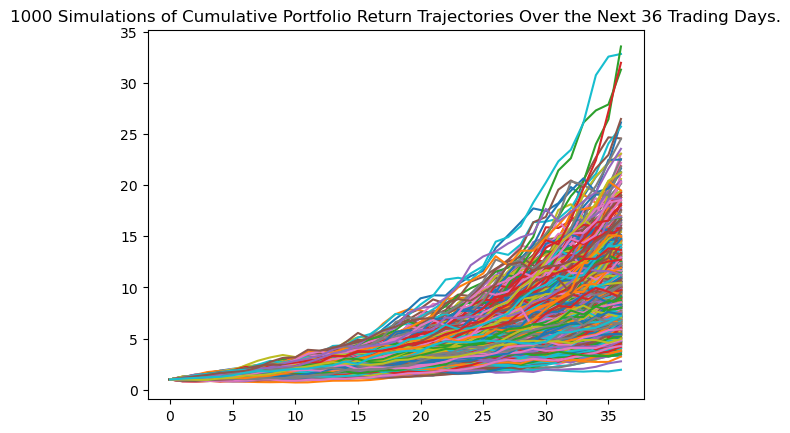

In [12]:


# Configuring a Monte Carlo simulation to forecast 35 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = combined_df_2,
    
    num_simulation = 1000,
    num_trading_days = 12 * 3 # Typically use 252 trading days for stocks, adjust if needed
)
# Printing the simulation input data
print(MC_thirtyyear.portfolio_data.head())
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()
# Save the plot for future usage
line_plot.get_figure().savefig("All_threeyear_sim_plot.png", bbox_inches="tight")
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()
# Print summary statistics
print(tbl)

In [13]:
China_combined_df = combined_df_2.drop(columns=['Other', 'Russia', 'US', 'Malaysia',
    'Iran', 'kazakhstan', 'Canada', 'Germany', 'Ireland'])
China_combined_df

,China
,close
date,
2019-09-01,66.76
2019-10-01,71.03
2019-11-01,66.21
2019-12-01,70.06
2020-01-01,79.41
2020-02-01,80.59
2020-03-01,71.65
2020-04-01,72.19


In [14]:
China_combined_df.std()

China  close    25.050316
dtype: float64

In [15]:
China_combined_df_2 = China_combined_df.replace(0,35)
China_combined_df_2.head(30)

,China
,close
date,
2019-09-01,66.76
2019-10-01,71.03
2019-11-01,66.21
2019-12-01,70.06
2020-01-01,79.41
2020-02-01,80.59
2020-03-01,71.65
2020-04-01,72.19


            China             
            close daily_return
date                          
2019-09-01  66.76          NaN
2019-10-01  71.03     0.063960
2019-11-01  66.21    -0.067859
2019-12-01  70.06     0.058148
2020-01-01  79.41     0.133457
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation n

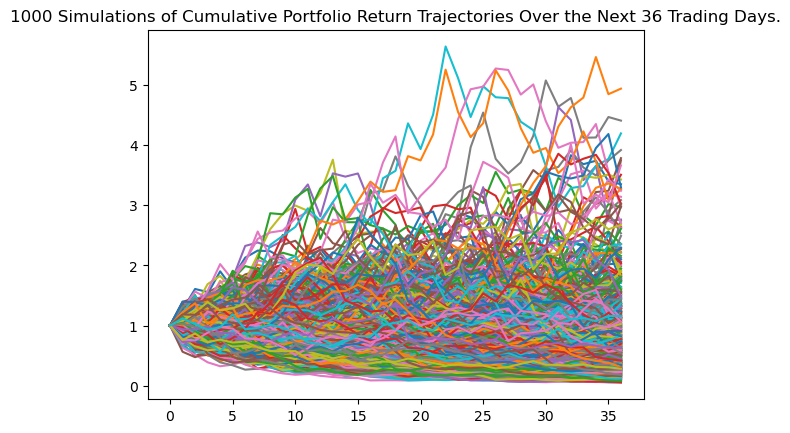

In [16]:

# Configuring a Monte Carlo simulation to forecast 35 years cumulative returns
MC_China_thirtyyear = MCSimulation(
    portfolio_data = China_combined_df_2,
    
    num_simulation = 1000,
    num_trading_days = 12 * 3 # Typically use 252 trading days for stocks, adjust if needed
)
# Printing the simulation input data
print(MC_China_thirtyyear.portfolio_data.head())
# Plot simulation outcomes
line_plot = MC_China_thirtyyear.plot_simulation()
# Save the plot for future usage
line_plot.get_figure().savefig("MC_China_thirtyyear_sim_plot.png", bbox_inches="tight")
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_China_thirtyyear.summarize_cumulative_return()
# Print summary statistics
print(tbl)

            China             
            close daily_return
date                          
2019-09-01  66.76          NaN
2019-10-01  71.03     0.063960
2019-11-01  66.21    -0.067859
2019-12-01  70.06     0.058148
2020-01-01  79.41     0.133457
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation n

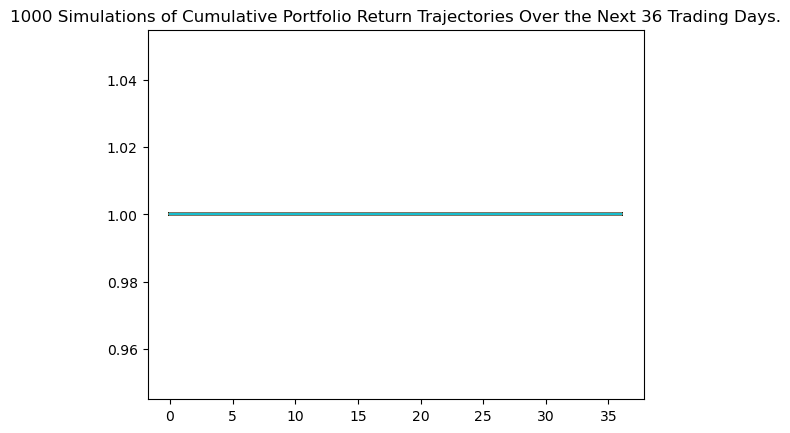

In [17]:

# Configuring a Monte Carlo simulation to forecast 35 years cumulative returns
MC_China_thirtyyear = MCSimulation(
    portfolio_data = China_combined_df,
    
    num_simulation = 1000,
    num_trading_days = 12 * 3 # Typically use 252 trading days for stocks, adjust if needed
)
# Printing the simulation input data
print(MC_China_thirtyyear.portfolio_data.head())
# Plot simulation outcomes
line_plot = MC_China_thirtyyear.plot_simulation()
# Save the plot for future usage
line_plot.get_figure().savefig("MC_China_thirtyyear_sim_plot.png", bbox_inches="tight")
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_China_thirtyyear.summarize_cumulative_return()
# Print summary statistics
print(tbl)

In [18]:
US_combined_df = combined_df_2.drop(columns=['China', 'Other', 'Russia', 'Malaysia',
    'Iran', 'kazakhstan', 'Canada', 'Germany', 'Ireland'])
US_combined_df

,US
,close
date,
2019-09-01,3.59
2019-10-01,5.30
2019-11-01,6.02
2019-12-01,3.69
2020-01-01,3.76
2020-02-01,5.02
2020-03-01,7.55
2020-04-01,8.07


              US             
           close daily_return
date                         
2019-09-01  3.59          NaN
2019-10-01  5.30     0.476323
2019-11-01  6.02     0.135849
2019-12-01  3.69    -0.387043
2020-01-01  3.76     0.018970
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 17

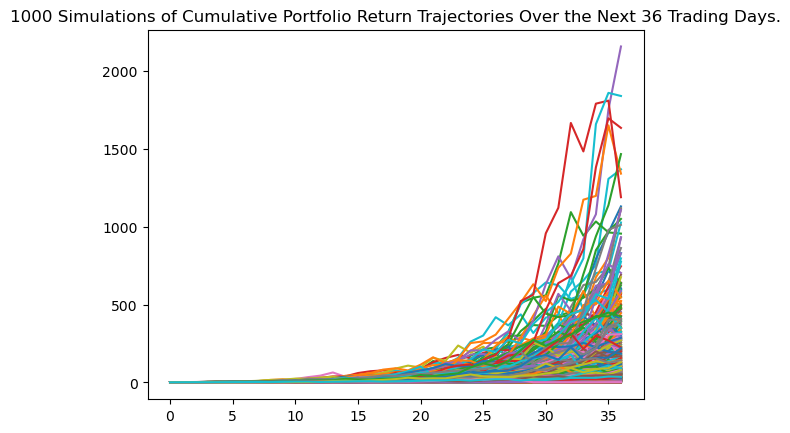

In [19]:
# Configuring a Monte Carlo simulation to forecast 35 years cumulative returns
MC_US_thirtyyear = MCSimulation(
    portfolio_data = US_combined_df,
    
    num_simulation = 1000,
    num_trading_days = 12 * 3 # Typically use 252 trading days for stocks, adjust if needed
)
# Printing the simulation input data
print(MC_US_thirtyyear.portfolio_data.head())
# Plot simulation outcomes
line_plot = MC_US_thirtyyear.plot_simulation()
# Save the plot for future usage
line_plot.get_figure().savefig("MC_US_thirtyyear_sim_plot.png", bbox_inches="tight")
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_US_thirtyyear.summarize_cumulative_return()
# Print summary statistics
print(tbl)

In [20]:
Other_combined_df = combined_df_2.drop(columns=['China', 'Russia', 'US', 'Malaysia',
    'Iran', 'kazakhstan', 'Canada', 'Germany', 'Ireland'])
Other_combined_df

,Other
,close
date,
2019-09-01,5.39
2019-10-01,5.98
2019-11-01,6.10
2019-12-01,5.92
2020-01-01,6.08
2020-02-01,5.98
2020-03-01,5.79
2020-04-01,5.96


           Other             
           close daily_return
date                         
2019-09-01  5.39          NaN
2019-10-01  5.98     0.109462
2019-11-01  6.10     0.020067
2019-12-01  5.92    -0.029508
2020-01-01  6.08     0.027027
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 17

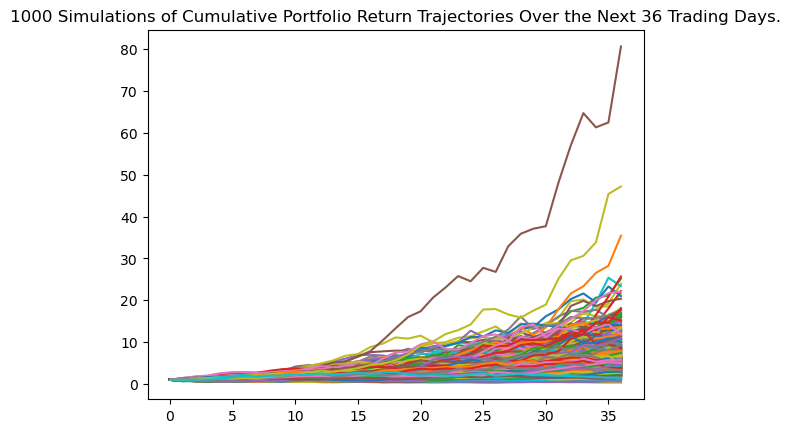

In [21]:
# Configuring a Monte Carlo simulation to forecast 35 years cumulative returns
MC_Other_thirtyyear = MCSimulation(
    portfolio_data = Other_combined_df,
    
    num_simulation = 1000,
    num_trading_days = 12 * 3 # Typically use 252 trading days for stocks, adjust if needed
)
# Printing the simulation input data
print(MC_Other_thirtyyear.portfolio_data.head())
# Plot simulation outcomes
line_plot = MC_Other_thirtyyear.plot_simulation()
# Save the plot for future usage
line_plot.get_figure().savefig("MC_Other_thirtyyear_sim_plot.png", bbox_inches="tight")
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_Other_thirtyyear.summarize_cumulative_return()
# Print summary statistics
print(tbl)

In [22]:
Russia_combined_df = combined_df_2.drop(columns=['China', 'Other', 'US', 'Malaysia',
    'Iran', 'kazakhstan', 'Canada', 'Germany', 'Ireland'])
Russia_combined_df

,Russia
,close
date,
2019-09-01,5.24
2019-10-01,5.57
2019-11-01,5.72
2019-12-01,5.94
2020-01-01,6.60
2020-02-01,6.14
2020-03-01,6.37
2020-04-01,7.69


           Russia             
            close daily_return
date                          
2019-09-01   5.24          NaN
2019-10-01   5.57     0.062977
2019-11-01   5.72     0.026930
2019-12-01   5.94     0.038462
2020-01-01   6.60     0.111111
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation n

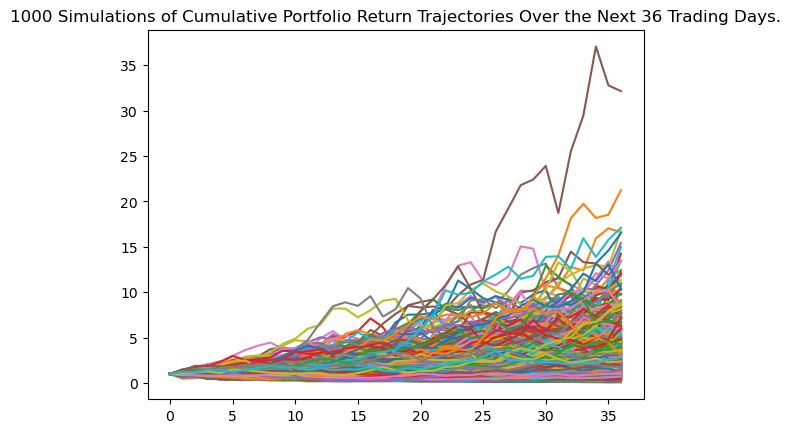

In [23]:
# Configuring a Monte Carlo simulation to forecast 35 years cumulative returns
MC_Russia_thirtyyear = MCSimulation(
    portfolio_data = Russia_combined_df,
    
    num_simulation = 1000,
    num_trading_days = 12 * 3 # Typically use 252 trading days for stocks, adjust if needed
)
# Printing the simulation input data
print(MC_Russia_thirtyyear.portfolio_data.head())
# Plot simulation outcomes
line_plot = MC_Russia_thirtyyear.plot_simulation()
# Save the plot for future usage
line_plot.get_figure().savefig("MC_Russia_thirtyyear_sim_plot.png", bbox_inches="tight")
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_Russia_thirtyyear.summarize_cumulative_return()
# Print summary statistics
print(tbl)

In [24]:
Malaysia_combined_df = combined_df_2.drop(columns=['China', 'Other', 'Russia', 'US',
    'Iran', 'kazakhstan', 'Canada', 'Germany', 'Ireland'])
Malaysia_combined_df

,Malaysia
,close
date,
2019-09-01,2.88
2019-10-01,3.10
2019-11-01,3.35
2019-12-01,3.74
2020-01-01,4.52
2020-02-01,4.35
2020-03-01,4.39
2020-04-01,4.82


           Malaysia             
              close daily_return
date                            
2019-09-01     2.88          NaN
2019-10-01     3.10     0.076389
2019-11-01     3.35     0.080645
2019-12-01     3.74     0.116418
2020-01-01     4.52     0.208556
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Ca

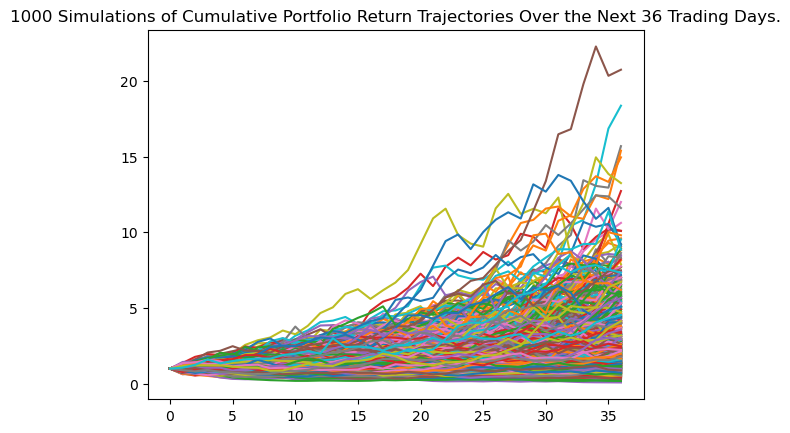

In [25]:
# Configuring a Monte Carlo simulation to forecast 35 years cumulative returns
MC_Malaysia_thirtyyear = MCSimulation(
    portfolio_data = Malaysia_combined_df,
    
    num_simulation = 1000,
    num_trading_days = 12 * 3 # Typically use 252 trading days for stocks, adjust if needed
)
# Printing the simulation input data
print(MC_Malaysia_thirtyyear.portfolio_data.head())
# Plot simulation outcomes
line_plot = MC_Malaysia_thirtyyear.plot_simulation()
# Save the plot for future usage
line_plot.get_figure().savefig("MC_Malaysia_thirtyyear_sim_plot.png", bbox_inches="tight")
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_Malaysia_thirtyyear.summarize_cumulative_return()
# Print summary statistics
print(tbl)

In [26]:
Iran_combined_df = combined_df_2.drop(columns=['China', 'Other', 'Russia', 'US', 'Malaysia',
    'kazakhstan', 'Canada', 'Germany', 'Ireland'])
Iran_combined_df

,Iran
,close
date,
2019-09-01,1.54
2019-10-01,1.68
2019-11-01,1.46
2019-12-01,2.59
2020-01-01,3.50
2020-02-01,3.32
2020-03-01,3.77
2020-04-01,4.25


            Iran             
           close daily_return
date                         
2019-09-01  1.54          NaN
2019-10-01  1.68     0.090909
2019-11-01  1.46    -0.130952
2019-12-01  2.59     0.773973
2020-01-01  3.50     0.351351
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 17

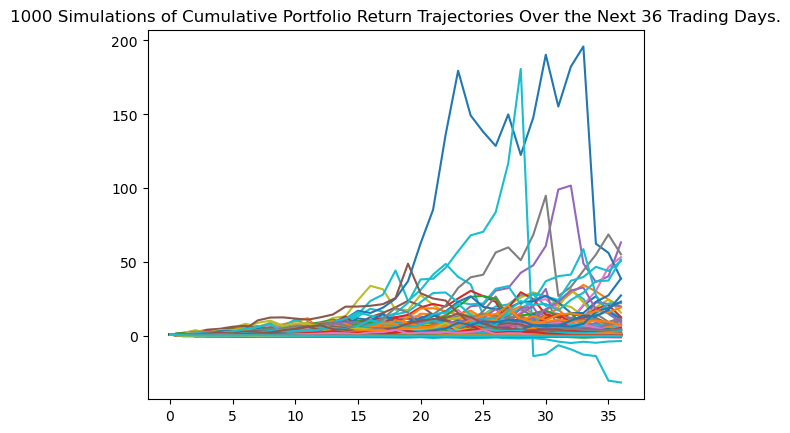

In [27]:
# Configuring a Monte Carlo simulation to forecast 35 years cumulative returns
MC_Iran_thirtyyear = MCSimulation(
    portfolio_data = Iran_combined_df,
    
    num_simulation = 1000,
    num_trading_days = 12 * 3 # Typically use 252 trading days for stocks, adjust if needed
)
# Printing the simulation input data
print(MC_Iran_thirtyyear.portfolio_data.head())
# Plot simulation outcomes
line_plot = MC_Iran_thirtyyear.plot_simulation()
# Save the plot for future usage
line_plot.get_figure().savefig("MC_Iran_thirtyyear_sim_plot.png", bbox_inches="tight")
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_Iran_thirtyyear.summarize_cumulative_return()
# Print summary statistics
print(tbl)

In [28]:
Kazakhstan_combined_df = combined_df_2.drop(columns=['China', 'Other', 'Russia', 'US', 'Malaysia',
    'Iran', 'Canada', 'Germany', 'Ireland'])
Kazakhstan_combined_df

,kazakhstan
,close
date,
2019-09-01,1.26
2019-10-01,1.30
2019-11-01,1.56
2019-12-01,2.08
2020-01-01,3.81
2020-02-01,3.60
2020-03-01,6.00
2020-04-01,6.88


           kazakhstan             
                close daily_return
date                              
2019-09-01       1.26          NaN
2019-10-01       1.30     0.031746
2019-11-01       1.56     0.200000
2019-12-01       2.08     0.333333
2020-01-01       3.81     0.831731
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.


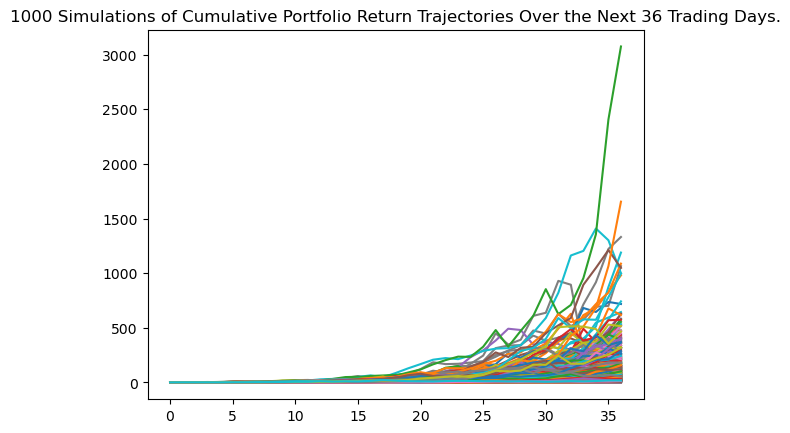

In [29]:
# Configuring a Monte Carlo simulation to forecast 35 years cumulative returns
MC_Kazakhstan_thirtyyear = MCSimulation(
    portfolio_data = Kazakhstan_combined_df,
    
    num_simulation = 1000,
    num_trading_days = 12 * 3 # Typically use 252 trading days for stocks, adjust if needed
)
# Printing the simulation input data
print(MC_Kazakhstan_thirtyyear.portfolio_data.head())
# Plot simulation outcomes
line_plot = MC_Kazakhstan_thirtyyear.plot_simulation()
# Save the plot for future usage
line_plot.get_figure().savefig("MC_Kazakhstan_thirtyyear_sim_plot.png", bbox_inches="tight")
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_Kazakhstan_thirtyyear.summarize_cumulative_return()
# Print summary statistics
print(tbl)

In [30]:
Canada_combined_df = combined_df_2.drop(columns=['China', 'Other', 'Russia', 'US', 'Malaysia',
    'Iran', 'kazakhstan', 'Germany', 'Ireland'])
Canada_combined_df

,Canada
,close
date,
2019-09-01,0.94
2019-10-01,0.61
2019-11-01,0.79
2019-12-01,0.98
2020-01-01,1.16
2020-02-01,1.02
2020-03-01,0.85
2020-04-01,0.91


           Canada             
            close daily_return
date                          
2019-09-01   0.94          NaN
2019-10-01   0.61    -0.351064
2019-11-01   0.79     0.295082
2019-12-01   0.98     0.240506
2020-01-01   1.16     0.183673
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation n

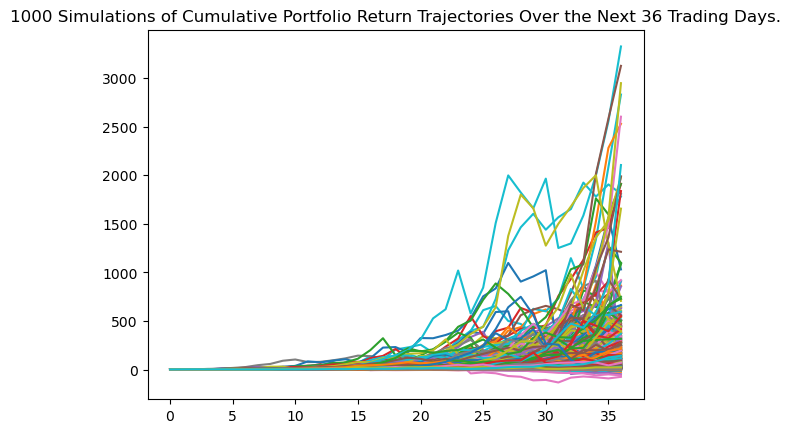

In [31]:
# Configuring a Monte Carlo simulation to forecast 35 years cumulative returns
MC_Canada_thirtyyear = MCSimulation(
    portfolio_data = Canada_combined_df,
    
    num_simulation = 1000,
    num_trading_days = 12 * 3 # Typically use 252 trading days for stocks, adjust if needed
)
# Printing the simulation input data
print(MC_Canada_thirtyyear.portfolio_data.head())
# Plot simulation outcomes
line_plot = MC_Canada_thirtyyear.plot_simulation()
# Save the plot for future usage
line_plot.get_figure().savefig("MC_Canada_thirtyyear_sim_plot.png", bbox_inches="tight")
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_Canada_thirtyyear.summarize_cumulative_return()
# Print summary statistics
print(tbl)

In [32]:
Germany_combined_df = combined_df_2.drop(columns=['China', 'Other', 'Russia', 'US', 'Malaysia',
    'Iran', 'kazakhstan', 'Canada', 'Ireland'])
Germany_combined_df

,Germany
,close
date,
2019-09-01,0.80
2019-10-01,0.41
2019-11-01,0.31
2019-12-01,0.38
2020-01-01,0.42
2020-02-01,0.41
2020-03-01,0.46
2020-04-01,0.63


           Germany             
             close daily_return
date                           
2019-09-01    0.80          NaN
2019-10-01    0.41    -0.487500
2019-11-01    0.31    -0.243902
2019-12-01    0.38     0.225806
2020-01-01    0.42     0.105263
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simu

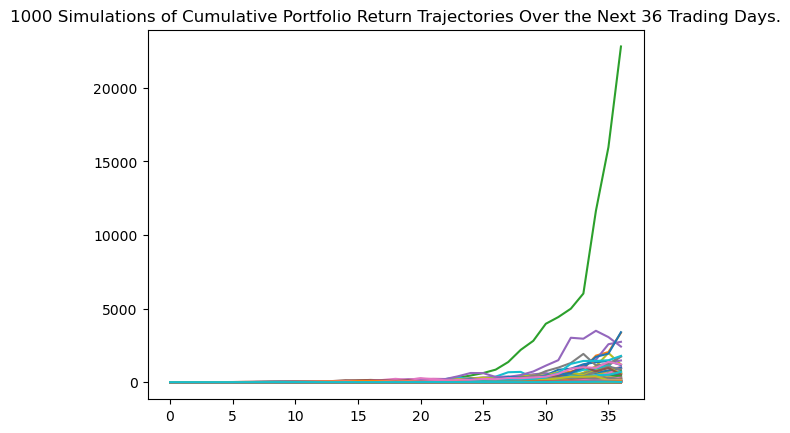

In [33]:
# Configuring a Monte Carlo simulation to forecast 35 years cumulative returns
MC_Germany_thirtyyear = MCSimulation(
    portfolio_data = Germany_combined_df,
    
    num_simulation = 1000,
    num_trading_days = 12 * 3 # Typically use 252 trading days for stocks, adjust if needed
)
# Printing the simulation input data
print(MC_Germany_thirtyyear.portfolio_data.head())
# Plot simulation outcomes
line_plot = MC_Germany_thirtyyear.plot_simulation()
# Save the plot for future usage
line_plot.get_figure().savefig("MC_Germany_thirtyyear_sim_plot.png", bbox_inches="tight")
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_Germany_thirtyyear.summarize_cumulative_return()
# Print summary statistics
print(tbl)

In [34]:
Ireland_combined_df = combined_df_2.drop(columns=['China', 'Other', 'Russia', 'US', 'Malaysia',
    'Iran', 'kazakhstan', 'Canada', 'Germany'])
Ireland_combined_df

,Ireland
,close
date,
2019-09-01,0.00
2019-10-01,0.00
2019-11-01,0.00
2019-12-01,0.00
2020-01-01,0.00
2020-02-01,0.00
2020-03-01,0.00
2020-04-01,0.00


           Ireland             
             close daily_return
date                           
2019-09-01     0.0          NaN
2019-10-01     0.0          NaN
2019-11-01     0.0          NaN
2019-12-01     0.0          NaN
2020-01-01     0.0          NaN
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simu

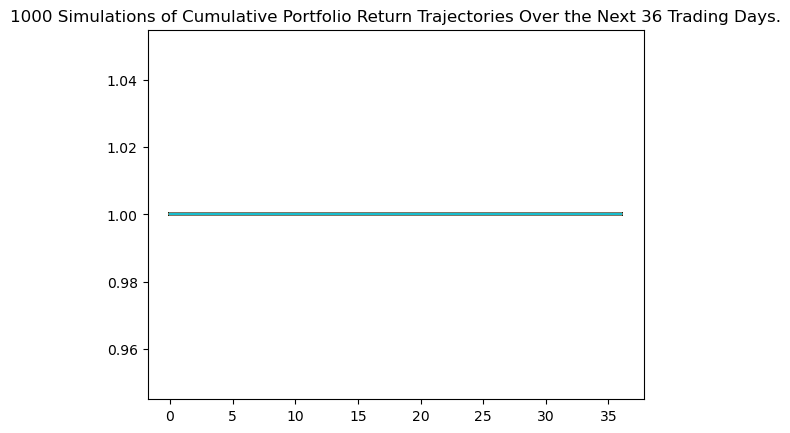

In [35]:
# Configuring a Monte Carlo simulation to forecast 35 years cumulative returns
MC_Ireland_thirtyyear = MCSimulation(
    portfolio_data = Ireland_combined_df,
    
    num_simulation = 1000,
    num_trading_days = 12 * 3 # Typically use 252 trading days for stocks, adjust if needed
)
# Printing the simulation input data
print(MC_Ireland_thirtyyear.portfolio_data.head())
# Plot simulation outcomes
line_plot = MC_Ireland_thirtyyear.plot_simulation()
# Save the plot for future usage
line_plot.get_figure().savefig("MC_Ireland_thirtyyear_sim_plot.png", bbox_inches="tight")
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_Ireland_thirtyyear.summarize_cumulative_return()
# Print summary statistics
print(tbl)

In [36]:
Ireland_combined_df_2 = Ireland_combined_df.replace(0,.0001)
Ireland_combined_df_2.head(30)

,Ireland
,close
date,
2019-09-01,0.0001
2019-10-01,0.0001
2019-11-01,0.0001
2019-12-01,0.0001
2020-01-01,0.0001
2020-02-01,0.0001
2020-03-01,0.0001
2020-04-01,0.0001


           Ireland             
             close daily_return
date                           
2019-09-01  0.0001          NaN
2019-10-01  0.0001          0.0
2019-11-01  0.0001          0.0
2019-12-01  0.0001          0.0
2020-01-01  0.0001          0.0
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simu

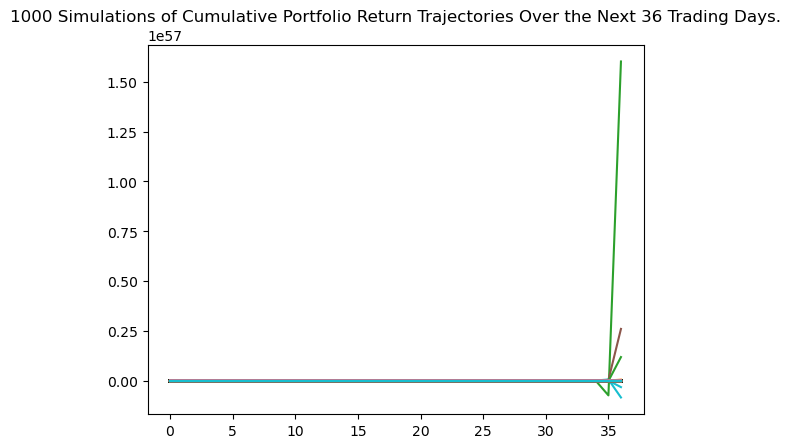

In [37]:
# Configuring a Monte Carlo simulation to forecast 35 years cumulative returns
MC_Ireland_thirtyyear = MCSimulation(
    portfolio_data = Ireland_combined_df_2,
    
    num_simulation = 1000,
    num_trading_days = 12 * 3 # Typically use 252 trading days for stocks, adjust if needed
)
# Printing the simulation input data
print(MC_Ireland_thirtyyear.portfolio_data.head())
# Plot simulation outcomes
line_plot = MC_Ireland_thirtyyear.plot_simulation()
# Save the plot for future usage
line_plot.get_figure().savefig("MC_Ireland_thirtyyear_sim_plot.png", bbox_inches="tight")
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_Ireland_thirtyyear.summarize_cumulative_return()
# Print summary statistics
print(tbl)

In [38]:
geo = {'Country' : ["China", "Russia", "US", "Malaysia",
    "Iran", "kazakhstan", "Canada", "Germany", "Ireland"], 
       'Latitude': [39.9042,61.5240,38.9072,4.2105,32.4279,48.0196,56.1304,51.1657,53.7798], 
       'Longitude': [116.4074,105.3188,-77.0369,101.9758,53.6880,66.9237,-106.3468,10.4515,-7.3055], 
       'Mean': [0.7,2.7,115,2.4,1.3,98,139,101,5] }
country_geo = pd.DataFrame(data=geo)
country_geo.head(10)


,Country,Latitude,Longitude,Mean
0,China,39.9042,116.4074,0.7
1,Russia,61.5240,105.3188,2.7
2,US,38.9072,-77.0369,115.0
3,Malaysia,4.2105,101.9758,2.4
4,Iran,32.4279,53.6880,1.3
5,kazakhstan,48.0196,66.9237,98.0
6,Canada,56.1304,-106.3468,139.0
7,Germany,51.1657,10.4515,101.0
8,Ireland,53.7798,-7.3055,5.0


<Axes: xlabel='Country', ylabel='Mean'>

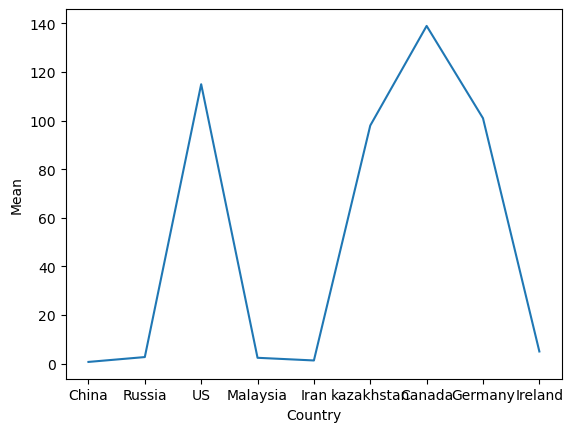

In [39]:

# Create a line plot
sns.lineplot(x='Country', y='Mean', data=country_geo)



<Axes: >

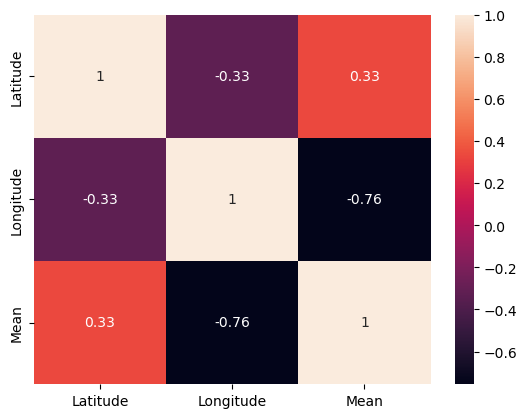

In [40]:
country_geo = country_geo.select_dtypes(exclude=['object'])
correlation_matrix = country_geo.corr()
sns.heatmap(correlation_matrix, annot=True)

In [46]:
# Create a plot to analyze neighborhood info

geo_plot = country_geo.hvplot.points(
    'Longitude',
    'Latitude',
    geo=True,
    size='Mean',
    color='red',
    tiles='OSM',
    frame_width=700,
    frame_height=500,
    hover_cols=['Country', 'Mean'],
)

geo_plot



:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (Mean)